In [2]:
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
from matplotlib import pyplot as plt
from glob import glob
from astropy.stats import LombScargle
from astroquery.simbad import Simbad
import astropy.coordinates as coord
import astropy.units as u
from scipy import stats
import warnings
from TESStools import *

%matplotlib inline

In [3]:
sample = pd.read_csv('sample.csv')
np.savetxt('sample_ticids.txt',np.unique(sample['ticid']),fmt='%s')
np.savetxt('unique_names.txt',np.unique(sample['CommonName']),fmt='%s')

```python
import warnings


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    fig = plt.figure(figsize=(20,100))
    
    data_dir = '../data/massive_lcs/'
    for i,ticid in enumerate(np.unique(massive['ticid'])):
        files = glob(data_dir+'*{}*'.format(ticid))
        lcs = []
        for f in files:
            lc = Table.read(f, format='fits')
            lcs.append(lc)
        outlc = vstack(lcs)
        plt.scatter(outlc['TIME'],0.01*i+outlc['PDCSAP_FLUX']/np.nanmedian(outlc['PDCSAP_FLUX']),alpha=0.5)
    plt.savefig('art.png')
    ```

In [7]:
paper_tids = [179305185,404850274,279957111,389437365,389565293,179206253,40404470,29984014]

In [11]:
lc, lc_smooth = lc_extract(get_lc_from_id(179206253), smooth=128)
len(lc)

18279

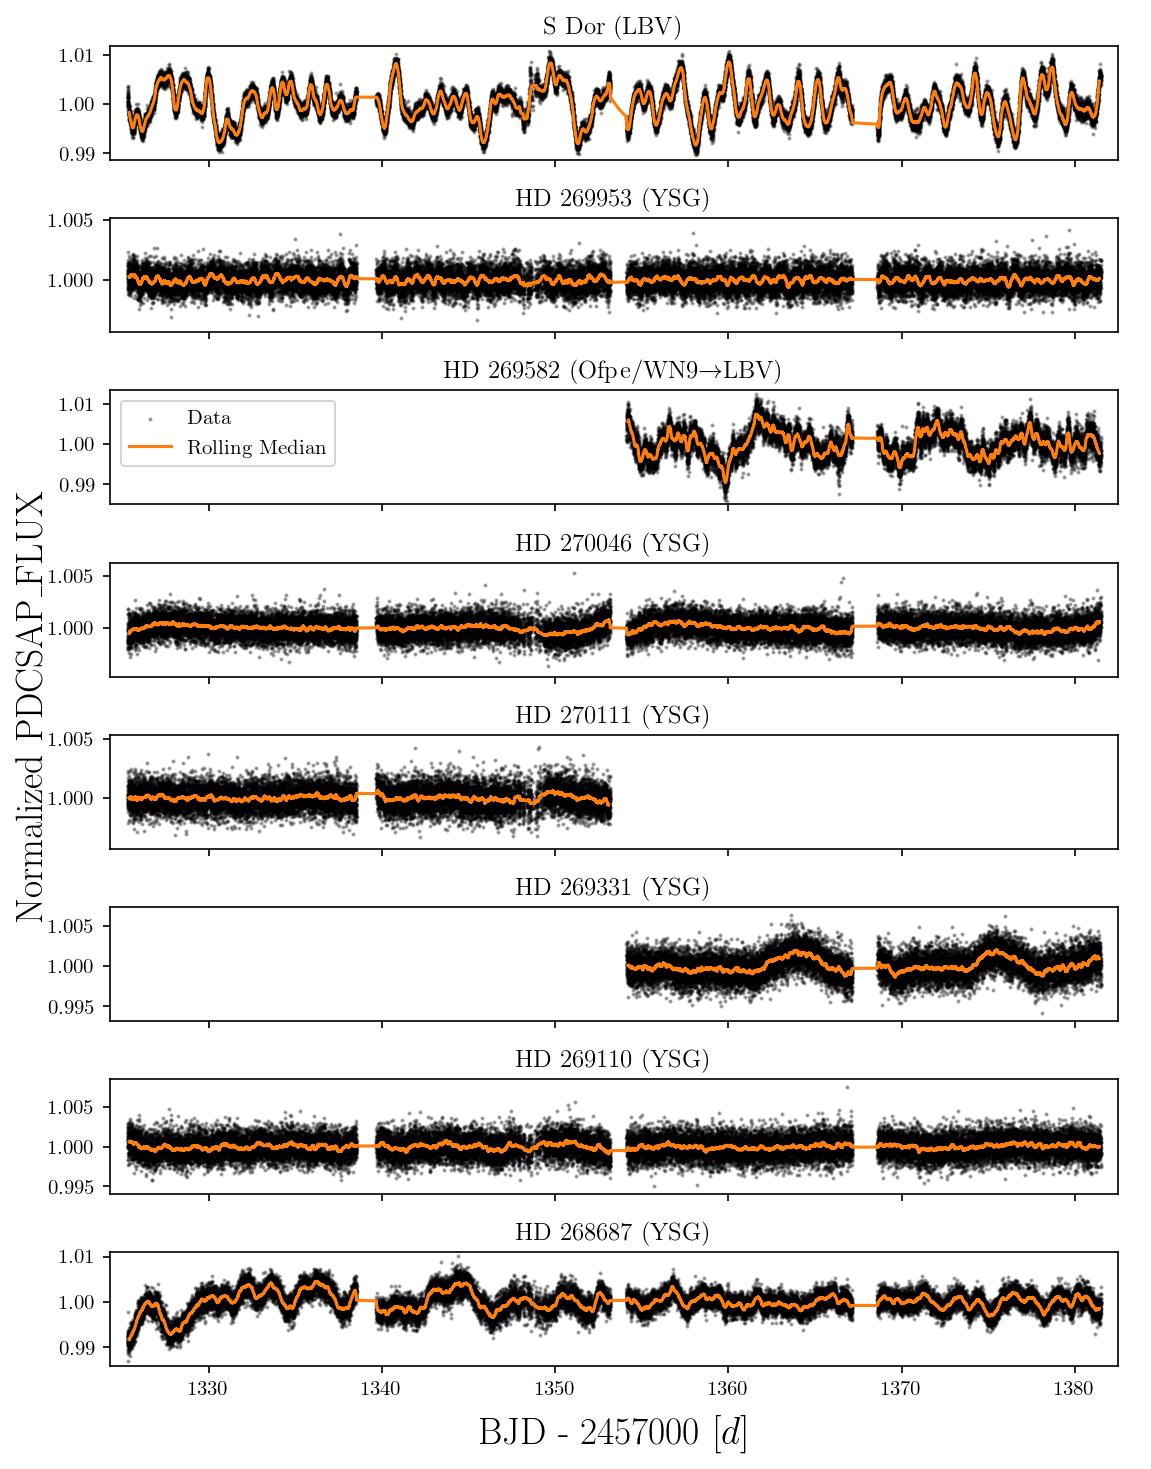

In [10]:
paper_types = ['LBV','YSG',r'Ofpe/WN9$\rightarrow$LBV','YSG','YSG','YSG','YSG','YSG']
nplots = len(paper_tids)
fig, axes = plt.subplots(nplots, figsize=(8,10), dpi=150, sharex=True)
for i,tid in enumerate(paper_tids):
    fname = np.unique(massive['CommonName'][massive['ticid']==tid])[0].replace('*','').replace('V','')
    lc, lc_smooth = lc_extract(get_lc_from_id(tid), smooth=128)
    
    foo = lc[['Time','Flux']]
    foo.to_csv('{0}.csv'.format(fname),index=False)
    
    ax = axes[i]
    ax.scatter(lc['Time'],lc['Flux'],s=1,c='k',alpha=0.3,label='Data')
    ax.plot(lc_smooth['Time'],lc_smooth['Flux'],c='C1',label='Rolling Median')
    ax.set(xlim=(np.min(lc['Time'])-1,np.max(lc['Time'])+1), ylim=(0.999*np.min(lc['Flux']),1.001*np.max(lc['Flux'])),title=fname+' ({0})'.format(paper_types[i]))
    h, l = ax.get_legend_handles_labels()

axes[2].legend(handles = h[::-1], labels = l[::-1])
labax = fig.add_subplot(111)
labax.spines['top'].set_color('none')
labax.spines['bottom'].set_color('none')
labax.spines['left'].set_color('none')
labax.spines['right'].set_color('none')
labax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
labax.set(xlabel='BJD - 2457000 [$d$]', ylabel='Normalized PDCSAP\_FLUX')
labax.set_zorder(-1)
fig.tight_layout()

labax.xaxis.label.set_size(18)
labax.yaxis.label.set_size(18)
for tick in labax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in labax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    
plt.savefig('../plots/all_lcs.pdf')